In [2]:
import numpy as np
import matplotlib.pyplot as plt
import 

<br>

# Model

In [269]:
i = 3
np.linspace(0, i-1, i)

array([0., 1., 2.])

In [271]:
np.power(np.repeat(B, i), np.linspace(0, i-1, i))

array([1.        , 0.92470588, 0.85508097])

In [312]:
def solow_swan(t, n, σ, δ, θ, k0, A, α, ɛ, s):
    """
    # number of periods
    # population growth rate
    # savings rate
    # depreciation rate
    # share of capital 
    # initial capital stock
    # technology constant
    # technology growth
    # stochastic vector 
    """
    
    B = (1+θ*n-δ*(1-θ))/(1+n); C = (δ+n)/(1+n)
    k_ss = ((σ*A)/(δ+n))**(1/(1-θ))
    kₑ = np.empty(t); kₑ[0] = k0
    kₐ_tilda = np.empty(t); kₐ_tilda[0] = np.log(k0)-np.log(k_ss)
    #kₐ_tilda = np.zeros(t)
    kb_tilda = np.empty(t); kb_tilda[0] = np.log(k0)-np.log(k_ss)
    
    for i in range(1,t): 
        kₑ[i] = ((1-δ)*kₑ[i-1]+σ*A*np.exp(s*ɛ[i-1])*(kₑ[i-1]**θ))/(1+n)
        kₐ_tilda[i] = C*np.sum(np.dot(np.power(np.repeat(B, i), np.linspace(0, i-1, i)),np.flip(s*ɛ[0:i]))) 
        kb_tilda[i] = B*kb_tilda[i-1]+C*(s*ɛ[i-1])
        
    kₑ_tilda = np.log(kₑ)-np.log(k_ss)
    kₐ = np.exp(kₐ_tilda+np.log(k_ss))
    γₑ = np.log(kₑ[1:])-np.log(kₑ[:-1])
    γₐ = np.log(kₐ[1:])-np.log(kₐ[:-1])
    #yₑ = A0*np.multiply(np.exp(s*ɛ), np.power(kₑ,θ))
    #yₐ = A0*np.multiply(np.exp(s*ɛ), np.power(kₐ,θ))
    #λₑ = np.log(yₑ[1:])-np.log(yₑ[:-1])
    #λₐ = np.log(yₐ[1:])-np.log(yₐ[:-1])
    
    return(
        [kₑ, kₑ_tilda, γₑ, yₑ, λₑ],
        [kₐ, kₐ_tilda, γₐ, yₐ, λₐ],
        np.append([np.log(k0)-np.log(k_ss)], 
                  C*np.dot(np.power(B*np.tril(np.ones(t-1)), 
                                    np.cumsum(np.ones((t-1,t-1))
                                              -np.triu(np.ones((t-1,t-1))),axis=0))
                           -(np.ones((t-1,t-1))
                             -np.tril(np.ones((t-1,t-1)))), s*ɛ))
    )

<br>

In [313]:
t = 200; n = 0.02; σ = 0.2; δ = 0.1; θ = 0.36; 
k0 = 2.2 ; A0 = 1; α = 0; ɛ = np.random.randn(t-1);s = 0.2;

In [314]:
exact, approx, kkk = solow_swan(t, n, σ, δ, θ, k0, A0, α, ɛ, s)
kₑ, kₑ_tilda, γₑ, yₑ, λₑ = exact
kₐ, kₐ_tilda, γₐ, yₐ, λₐ = approx

<br>

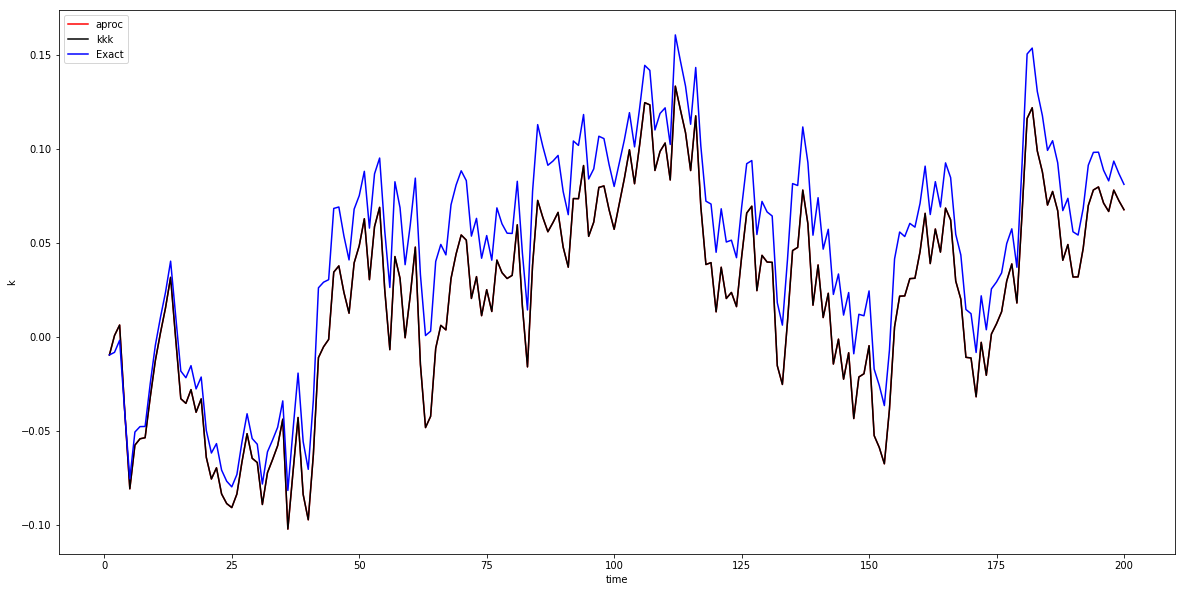

In [316]:
time = np.linspace(1, t, t)
plt.figure(figsize=(20,10))
plt.plot(time, kₐ_tilda, 'red', label='aproc')
plt.plot(time, kkk, 'black', label='kkk')
plt.plot(time, kₑ_tilda, 'blue', label='Exact')
plt.legend(loc='upper left')
plt.ylabel("k")
plt.xlabel("time")
plt.show()

<br>

ValueError: x and y must have same first dimension, but have shapes (4,) and (200,)

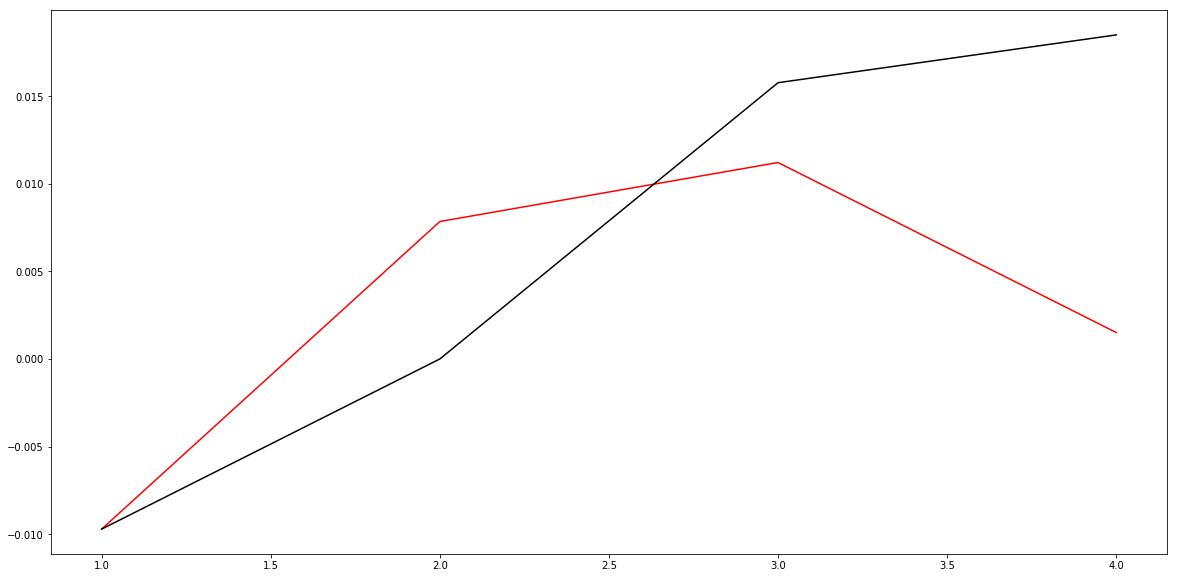

In [256]:
time = np.linspace(1, t, t)
plt.figure(figsize=(20,10))
plt.plot(time, kₑ_tilda, 'red', label='Exact')
plt.plot(time, kₐ_tilda, 'black', label='Exact')
plt.plot(time, brinca, 'black', linestyle = "--", label='Approximation')
plt.legend(loc='upper left')
plt.ylabel("k")
plt.xlabel("time")
plt.show()

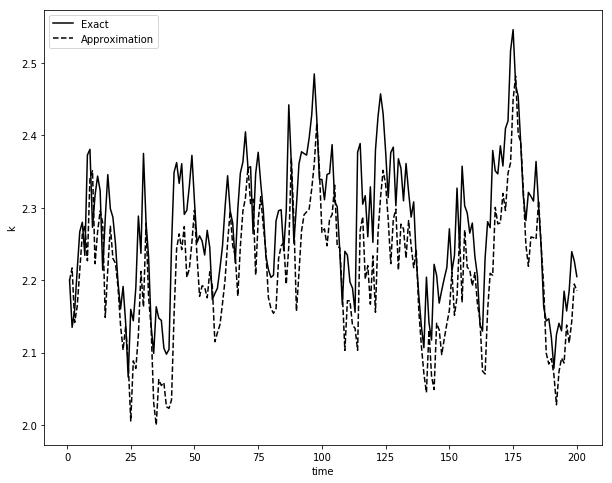

In [78]:
time = np.linspace(1, t, t)
plt.figure(figsize=(10,8))
plt.plot(time, kₑ, 'black', label='Exact')
plt.plot(time, kₐ, 'black', linestyle = "--", label='Approximation')
plt.legend(loc='upper left')
plt.ylabel("k")
plt.xlabel("time")
plt.show()

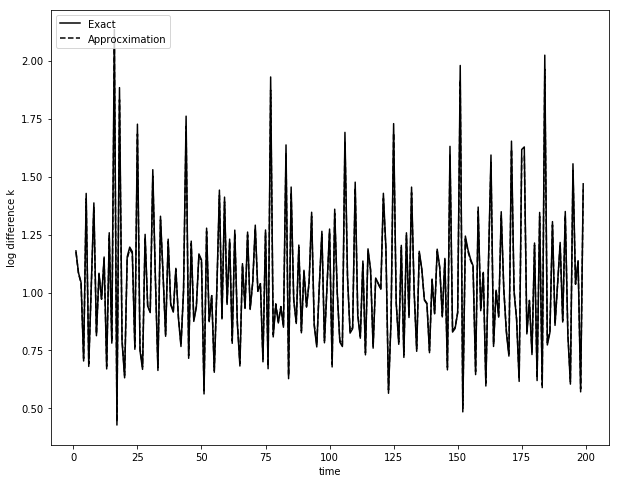

In [37]:
time_d = np.linspace(1, t-1, t-1)
plt.figure(figsize=(10,8))
plt.plot(time_d, np.exp(λₑ), 'black', label='Exact')
plt.plot(time_d, np.exp(λₐ), 'black', linestyle = "--", label='Approcximation')
plt.legend(loc='upper left')
plt.ylabel("log difference k")
plt.xlabel("time")
plt.show()

<br>

In [ ]:
time_d = np.linspace(1, t-1, t-1)
plt.figure(figsize=(20,8))
plt.plot(time_d, np.exp(λₑ), 'black', label='Exact')
plt.plot(time_d, np.exp(λₐ), 'black', linestyle = "--", label='Approcximation')
plt.legend(loc='upper left')
plt.show()